# K nearest neighbors and cross-validation


## Implementation : K-nearest neighbors and cross-validation

For this practical session, we will work on the real data mnist_digits.mat (digits), that can be downloaded from the course web page.

For classification problems with $K$ classes, we call the "confusion matrix" associated to data $D_n=(x_t,y_t)$ the matrix $M \in \mathbb{N}^{K \times K}$ such that $M_{i,j}$ is the number of elements with true class $i$ and predicted class $j$.

**NB**: Given that there are more than $66000$ images in the dataset, we only work on a subset of these $66000$ images so as to not go beyond the memory of your computer.

**1) Start by getting acquainted with the data. They are composed of a vector of labels `y` and images of size 28x28, given in matrix `x` of linearized vectors (each line of the matrix `x` corresponds to a single image).**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

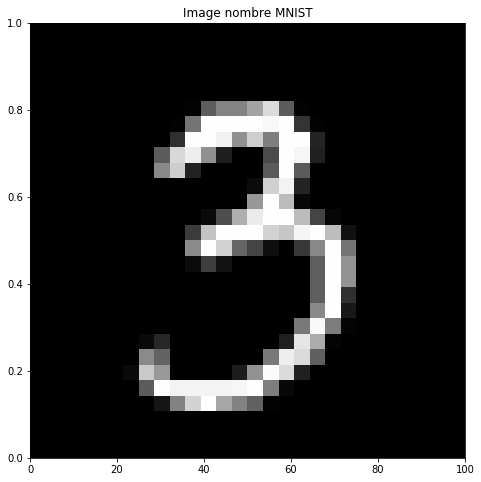

In [6]:
# Chargement des données
data = sio.loadmat('mnist_digits.mat')
X_total = np.array(data['x'])
Y_total = np.array(data['y'])
n_total = X_total.shape[0]

# Affichage d'une image
ind_im = 20000
im = X_total[ind_im,:].reshape((28, 28))

fig, (ax1) = plt.subplots(nrows=1, figsize=(8,8))
ax1.set_title('Image nombre MNIST')
ax1.imshow(im, extent=[0,100,0,1], aspect=100, cmap='gray')

**b) Select $6000$ images at random in the dataset.** 

**c) Split the images into two parts (with proportions $1/3,2/3$ for example) : a training set and a testing set.**

**2) We will now implement the nearest neighbor classification rule. For this, you may use the function `cdist` from the module `scipy.spatial.distance`. This function allows, given two design matrices to compute all squared Euclidean distances between points.**

**a) Write a function that takes as inputs the number $K$ of desired nearest neighbors, the training data, the testing data, and outputs the confusion matrix on the test data.**

For the confusion matrix, you can use the commande `confusion_matrix` from the module `sklearn.metrics`.

In [7]:
from scipy.spatial.distance import cdist


In [8]:
from sklearn.metrics import confusion_matrix


**b) Display the classification error on the training and testing data as a function of $k$ (number of nearest neighbors) (note that the implicit complexity / smoothness of the learned function is decreasing with the number of nearest neighbors). You can vary $k$ from 1 to 20 for example.**

**c) Split your training data into a reduced training data and a validation set (this technique is called simple validation). By using the previous code, write a function that will select the best $K$ by using the validation set. **

**d) Split several times randomly the original training data. Is the estimator of $K$ stable?**

**3) We now wish to select $K$ by cross-validation. Implement $V$-fold cross-validation for $V=8$ and select the best $K$. Vary randomly the split of the data into the folds and look at the behavior of the selected $K$. What do you notice?**

## Theoretical part : Non-consistency or NN for fixed k

As said in the title, we are going to show that the 1-NN classifier is not consistent. We consider the risk $\mathcal{R}(f) = \mathbb{E}[\ell(f(X), Y)]$.

**1 ) Recall the definition of the consistency of a classifier $\widehat{f}_n = \mathcal{A}(D_n)$ where $\widehat{f}_n: \mathbb{R}^d \longrightarrow \lbrace 0,1 \rbrace$.**

**Set-up of the exercise** : We consider binary classification with the $0-1$ loss where we has an $n$-sample $D_n=(x_i,y_i)$ with $\mathcal{X}=[0,1], \mathcal{Y}=\lbrace 0,1 \rbrace$. 

This $n$-sample is sampled i.i.d. as follows:
 $x_i$ come from some distribution $P$ that has a density $p$ with respect to the Lebesgue measure on $\mathcal{X}$. Labels $y_i$ are distributed so that $\forall x \in \mathcal{X},\eta(x)=\mathbb{P}(Y=1\vert X=x)=\alpha > \frac{1}{2}$.

From this $n$-sample, we build a classifier $\widehat{f}_n = \mathcal{A}(D_n)$. Keep in mind that $\widehat{f}_n$ is random due to $D_n = (X_1, \ldots, X_n, Y_1, \ldots, Y_n)$. Studying the consistency of the classification rule defined by $\widehat{f}_n$ is equivalent to studying the behavior $\widehat{f}_n$ when $n$ tends to infinity.


**2) For the learning problem above, give an expression of Bayes predictor and the associated Bayes risk.**

**3) We start by considering a classifier $f$ that does not depend on the training data $D_n$.  Let $X$ be a testing random variable independent of $D_n$. Show that the risk of $f$ can be expressed as (note that any binary classifier can be written as $f(X)=\mathbb{1}_{\lbrace f(X)=1 \rbrace}$): 
$$\mathcal{R}(f)=\alpha-(2 \alpha -1)\mathbb{E}_{X}[f(X)].$$**

**4) We now consider the classifier obtained from 1-NN $\widehat{f}^1$ and we will show it is not consistent.**

 **a) Show that each $Y_i$ is independent from $(X_1,\ldots, X_n)$ (a simple intuitive justification suffices).**

**b) By introducing the variable $B_i(X)$ that is equal to 1 if the example $i$ from the sample is the nearest neighbor of $X$ and 0 otherwise, express $\widehat{f}^1(X)$ as a sum of random variables .**

*Remark : it is natural to wonder how to do in practice when a test point is equidistant to several training points. In this exercise, since input variables have a density, this occurs with zero probability. In general, when this occurs, several strategies can be used to alleviate the problem, e.g., random allocation or allocation to the smallest $i$.*


**c) What is the expectation of $Y_i$ given $(X_1,\ldots, X_n)$? Give the expression of the expectation of $\widehat{f}^1(x)$ given $(X_1, \ldots X_n)$ (the expectation is taken with respect to $X$ and the $Y_i$'s).**

**5) Compute the risk of $\widehat{f}^1$ and deduce that the $1$-NN method is not consistent.**

**6) We now consider the same binary classification problem on $\mathcal{X}$ with the classifier $\widehat{f}^K$ with $K$ nearest neighbors. To make our lives easier, we assume that $K$ is odd.**

**a) Taking inspiration from the case $K=1$ above, show that the risk of the  classifier $\widehat{f}^K$, conditioned on the training input data $(X_1, \ldots X_n)$ (that is, expectation of the risk of $\widehat{f}^K$ only with respect to the $Y_i$'s) can be expressed as a function of the probability that a binomial variable $U$ with parameters $K$ and $\alpha$ is greater than $\frac{K}{2}$ (We recall that $U$ is such a binomial random variable if $U$ can be written as the sum  $K$ independent Bernoulli random variables with parameter $\alpha$).**

**b) Show that in this case, the expectation of the risk of the $K$-NN classifier is stricly larger than the Bayes risk $1-\alpha$. We can use the fact that the expectation of $\widehat{f}^K$ is strictly less than one.**



**"Morale de l'histoire"**

The number of nearest neighbors has to depend on $n$. One can check that if we consider a sequence of integers $k_n$ such that $\lim_{n\rightarrow \infty} k_n = \infty$ and $\lim_{n\rightarrow \infty} k_n/n = 0$,then the assumptions of Stone's theorem are satisfied for all distributions. Thus, with this sequence $k_n$, we get universal consistency.
